<a href="https://colab.research.google.com/github/turgonboyev/Google_Colab_uchun/blob/main/CaliforniaMalumotlarniOrganish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv('https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
from IPython.display import Image

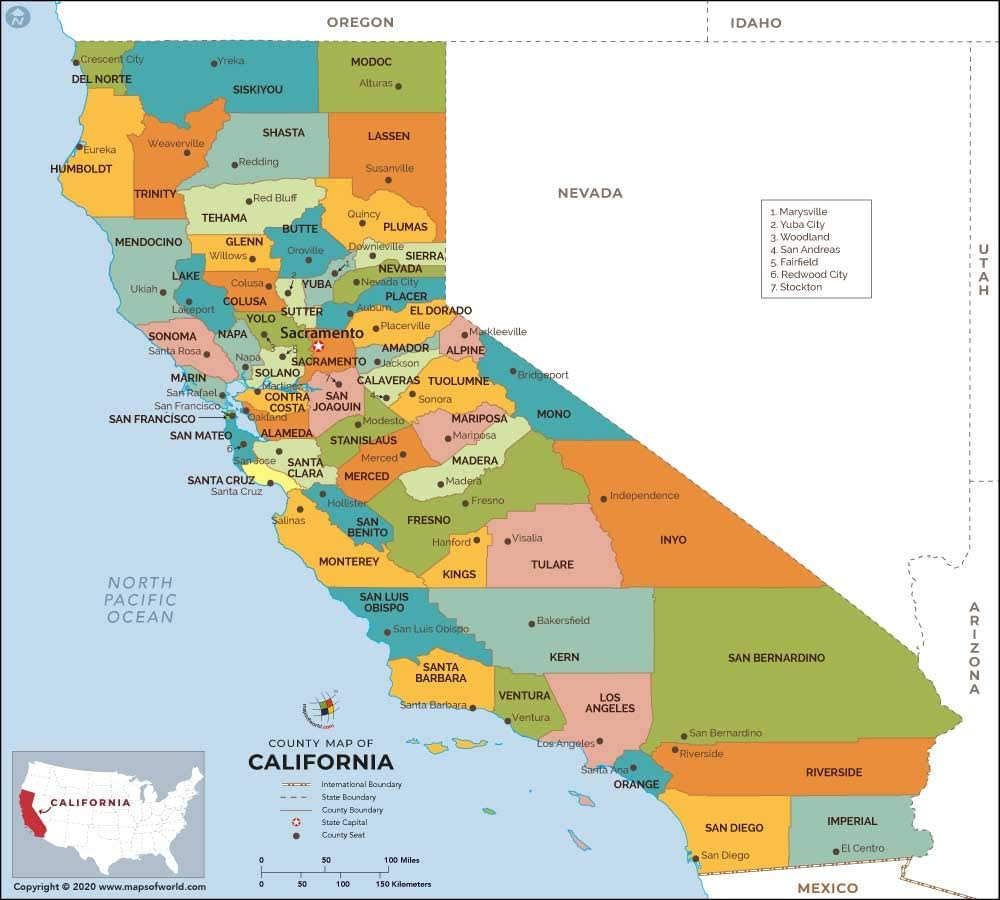

In [5]:
imgURL = 'https://m.media-amazon.com/images/I/61t27fuDlRL._AC_SL1000_.jpg'
Image(imgURL)

In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

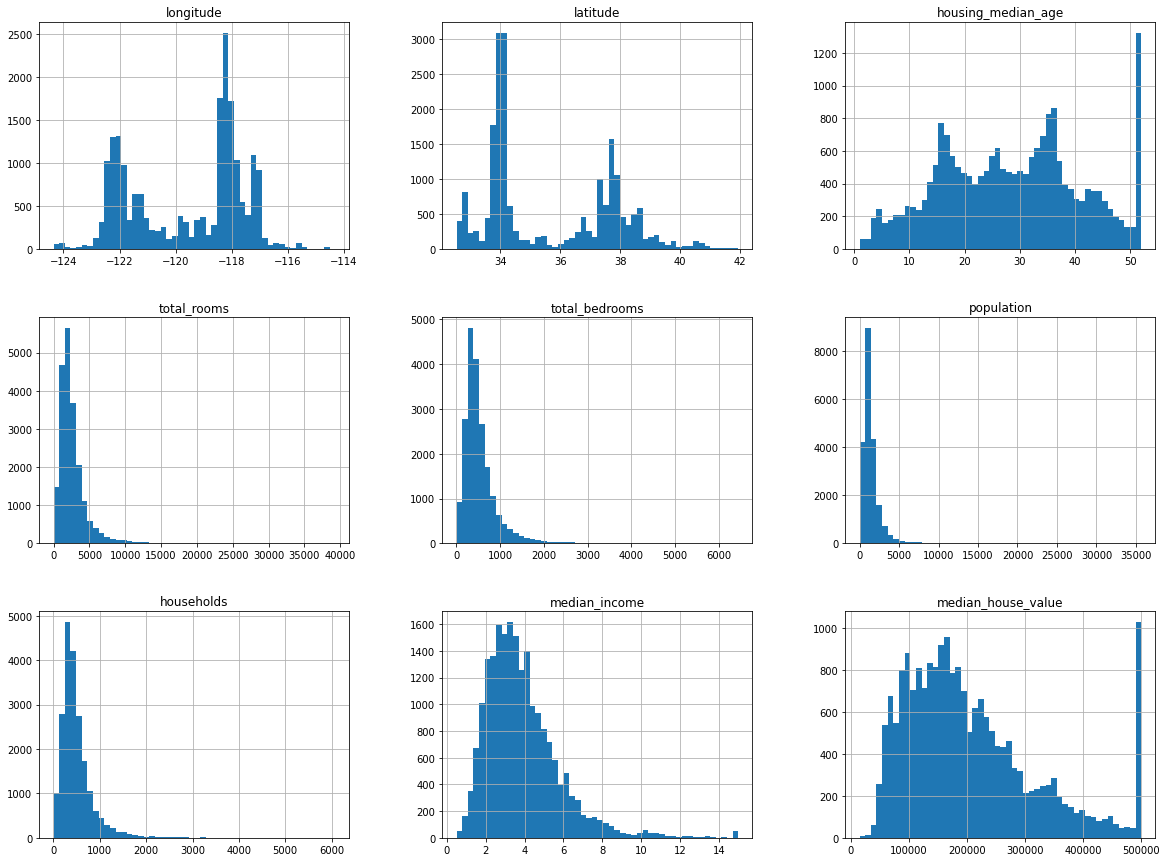

In [10]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=35)

train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,204200.0,NEAR BAY
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,95600.0,INLAND
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,112000.0,<1H OCEAN
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,410000.0,NEAR OCEAN
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,51600.0,INLAND


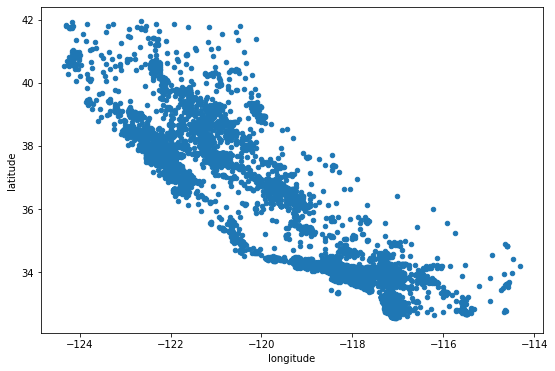

In [12]:
housing = train_set.copy()
housing.plot(kind="scatter", x='longitude', y='latitude', figsize=(9, 6))
plt.show()

#Xarita yasaladi hisob

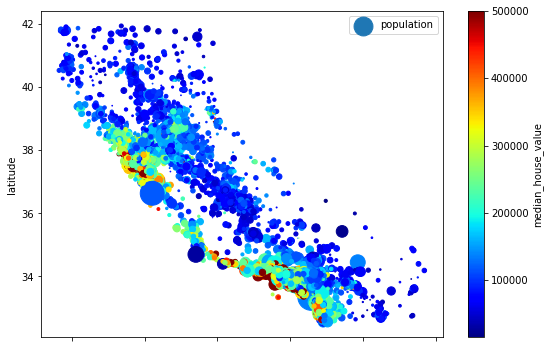

In [13]:
housing = train_set.copy()
housing.plot(kind="scatter", x='longitude', y='latitude', figsize=(9, 6),
             s=housing['population']/50, label='population', c='median_house_value', 
             cmap='jet', colorbar=True)
plt.show()

In [14]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687109
total_rooms           0.132943
housing_median_age    0.106175
households            0.066714
total_bedrooms        0.051019
population           -0.026685
longitude            -0.047650
latitude             -0.142797
dtype: float64

In [15]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,204200.0,NEAR BAY
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,95600.0,INLAND
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,112000.0,<1H OCEAN
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,410000.0,NEAR OCEAN
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,51600.0,INLAND


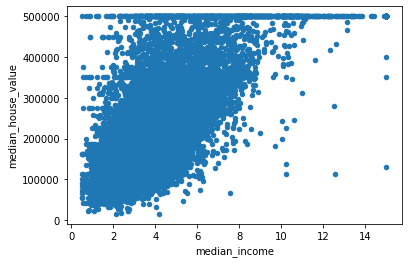

In [16]:
housing.plot(kind='scatter', x='median_income', y='median_house_value')

In [23]:
cols = ['housing_median_age',	'total_rooms', 'total_bedrooms', 'median_income',	'median_house_value']
houses = housing[cols]
houses.head()

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value
1380,6.0,10191.0,1882.0,5.2015,204200.0
12294,13.0,7804.0,1594.0,2.0549,95600.0
7387,37.0,794.0,210.0,2.2917,112000.0
14454,39.0,1877.0,426.0,3.8750,410000.0
2927,24.0,1941.0,484.0,1.0560,51600.0


In [19]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687109
total_rooms           0.132943
housing_median_age    0.106175
households            0.066714
total_bedrooms        0.051019
population           -0.026685
longitude            -0.047650
latitude             -0.142797
dtype: float64

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,204200.0,NEAR BAY
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,95600.0,INLAND
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,112000.0,<1H OCEAN
14454,-117.27,32.83,39.0,1877.0,426.0,805.0,409.0,3.8750,410000.0,NEAR OCEAN
2927,-119.01,35.36,24.0,1941.0,484.0,1277.0,435.0,1.0560,51600.0,INLAND


In [26]:
housing['badrooms_totalrooms'] = housing['total_rooms'] / housing['total_bedrooms']
housing['family_house'] = housing['households'] / housing['total_rooms']
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687109
badrooms_totalrooms    0.382212
total_rooms            0.132943
housing_median_age     0.106175
households             0.066714
total_bedrooms         0.051019
population            -0.026685
longitude             -0.047650
latitude              -0.142797
family_house          -0.210356
dtype: float64